# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name:varshini yenjarlapati

I have used the following AI tools: w3 schools,stack overflow,you tube,chatgpt3.5

I understand that my submission needs to be my own work: YV

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

In Visual Studio Code: Use Export (click on ... in the menu bar) to save your notebook as a HTML file.

In Colab you need to save the notebook on GoogleDrive and then add the following block

In [1]:
# !pip install nbconvert
#
# from google.colab import drive
# drive.mount('/content/drive')
# !jupyter nbconvert --to html /content/drive/MyDrive/Colab\ Notebooks/Copy\ of\ robot_vacuum.ipynb

You will need to fix the file location on your GoogleDrive.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [3]:
# make sure numpy is installed
!pip install -q numpy

In [4]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [5]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'east'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a different performance measure than the one specified in the PEAS description! Since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room. Your implementation needs to implement the **correct performance measure.** The energy budget of the agent is specified as `max_steps`.

In [6]:
def simple_environment(agent_function, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent_function(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [7]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: suck
step 1 - action: east
step 2 - action: suck
step 3 - action: east
step 4 - action: west
step 5 - action: south
step 6 - action: west
step 7 - action: east
step 8 - action: north
step 9 - action: north
step 10 - action: north
step 11 - action: west
step 12 - action: west
step 13 - action: suck
step 14 - action: south
step 15 - action: south
step 16 - action: south
step 17 - action: west
step 18 - action: south
step 19 - action: east


3

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable. For example, long lines may get cut off. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [8]:
import numpy as np
import random

# Initialize the room with some squares dirty based on dirt_prob
def initialize_room(n=5, dirt_prob=0.2):
    # 1 = Dirty, 0 = Clean
    room = np.random.choice([0, 1], size=(n, n), p=[1-dirt_prob, dirt_prob])
    return room

# Place the agent randomly in the room
def place_agent(n):
    return (random.randint(0, n-1), random.randint(0, n-1))

# Get the sensor readings for bumpers and dirt status
def get_sensors(agent_position, room):
    x, y = agent_position
    n = room.shape[0]
    bumpers = {
        "north": (x == 0),
        "south": (x == n-1),
        "west": (y == 0),
        "east": (y == n-1)
    }
    dirt = room[x, y]
    return bumpers, dirt

# Move the agent based on the action and bumpers
def move_agent(agent_position, action, bumpers):
    x, y = agent_position
    if action == "north" and not bumpers["north"]:
        return (x - 1, y)
    elif action == "south" and not bumpers["south"]:
        return (x + 1, y)
    elif action == "west" and not bumpers["west"]:
        return (x, y - 1)
    elif action == "east" and not bumpers["east"]:
        return (x, y + 1)
    return agent_position  # If bumpers block movement, stay in the same position

# The environment simulator
def environment(agent_function, room_size=5, dirt_prob=0.2,max_steps=50, verbose=True):
    # Initialize the room and agent position
    room = initialize_room(room_size, dirt_prob)
    agent_position = place_agent(room_size)
    total_energy = 0  # Performance measure: number of actions taken

    for step in range(max_steps):
        bumpers, dirty = get_sensors(agent_position, room)  # Get sensors (bumpers and dirt)
        action = agent_function(bumpers, dirty)  # Call agent function to get the next action

        # Perform the action
        if action == "suck":
            if dirty:
                room[agent_position] = 0  # Clean the square if dirty
        else:
            agent_position = move_agent(agent_position, action, bumpers)  # Move the agent

        # Increment the performance measure (1 action = 1 energy unit)
        total_energy += 1

        # Display the room and vacuum position directly if verbose mode is on
        if verbose:
            print(f"Step {step}: Action={action}, Position={agent_position}")

        # If all squares are clean, stop the simulation
        if np.sum(room) == 0:
            print("Room cleaned completely!")
            break

    # Print the total energy (steps taken)
    print(f"Total energy used: {total_energy} steps")
    return total_energy


# Run the simulation
total_energy_used = environment(simple_randomized_agent, room_size=5, dirt_prob=0.2, max_steps=50, verbose=True)


Step 0: Action=east, Position=(3, 1)
Step 1: Action=west, Position=(3, 0)
Step 2: Action=east, Position=(3, 1)
Step 3: Action=west, Position=(3, 0)
Step 4: Action=west, Position=(3, 0)
Step 5: Action=suck, Position=(3, 0)
Step 6: Action=east, Position=(3, 1)
Step 7: Action=east, Position=(3, 2)
Step 8: Action=west, Position=(3, 1)
Step 9: Action=west, Position=(3, 0)
Step 10: Action=north, Position=(2, 0)
Step 11: Action=suck, Position=(2, 0)
Step 12: Action=south, Position=(3, 0)
Step 13: Action=south, Position=(4, 0)
Step 14: Action=east, Position=(4, 1)
Step 15: Action=east, Position=(4, 2)
Step 16: Action=south, Position=(4, 2)
Step 17: Action=west, Position=(4, 1)
Step 18: Action=west, Position=(4, 0)
Step 19: Action=suck, Position=(4, 0)
Step 20: Action=west, Position=(4, 0)
Step 21: Action=east, Position=(4, 1)
Step 22: Action=suck, Position=(4, 1)
Step 23: Action=west, Position=(4, 0)
Step 24: Action=west, Position=(4, 0)
Step 25: Action=south, Position=(4, 0)
Step 26: Action=n

This code simulates an environment for an automatic vacuum cleaner robot, where the agent must clean a room of size `n x n` with dirt placed randomly in the squares based on a given probability.

### Components of the Code:

1. **Room Initialization (`initialize_room`)**:
   - Creates a 2D grid (room) of size `n x n` where each square is either dirty (`1`) or clean (`0`), determined by the given dirt probability (`dirt_prob`). The room layout is generated randomly.

2. **Agent Placement (`place_agent`)**:
   - The agent is placed randomly at any square in the room, using random coordinates.

3. **Sensors (`get_sensors`)**:
   - The function provides sensor inputs for the agent, including:
     - **Bumper sensors**: Detect whether the agent is at the edge of the room (north, south, west, or east).
     - **Dirt sensor**: Detects whether the current square is dirty (`1`) or clean (`0`).

4. **Agent Movement (`move_agent`)**:
   - Based on the agent's action (north, south, east, or west), this function updates the agent's position unless it's blocked by a wall (detected by the bumper sensors).

5. **Environment Simulator (`environment`)**:
   - Simulates the cleaning process. The agent:
     - Receives sensor inputs (bumper and dirt status).
     - Decides on an action based on the agent function provided.
     - Cleans the square if dirty or moves based on the action. The cleaning reduces the dirt in that square to `0`.
     - Tracks the number of steps (energy used) for the agent to clean the room.
     - Stops the simulation once all squares are clean or the maximum number of steps is reached.

6. **Simulation Execution**:
   - The simulation runs the environment for a room of size 5x5, with a dirt probability of 20% (`dirt_prob = 0.2`) and a maximum of 50 steps. It uses a simple randomized agent, which selects actions at random, to clean the room. The process is printed step by step when `verbose=True`.



## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function. Use the function signature for the `simple_randomized_agent` function above.

In [9]:

def simple_reflex_agent(bumpers, dirty):
    if dirty:
        return "suck"  # Clean the square if dirty
    else:
        # If the square is clean, move in a random valid direction (avoiding walls)
        actions = ["north", "south", "west", "east"]

        # Filter out directions where bumpers are True (i.e., there's a wall)
        valid_moves = [action for action in actions if not bumpers[action]]

        # Choose a random valid move (if no valid moves, agent stays and sucks)
        return random.choice(valid_moves) if valid_moves else "suck"

# Run the simulation with the simple reflex agent
total_energy_used = environment(simple_reflex_agent, room_size=5, dirt_prob=0.2, max_steps=50, verbose=True)


Step 0: Action=suck, Position=(1, 1)
Step 1: Action=north, Position=(0, 1)
Step 2: Action=south, Position=(1, 1)
Step 3: Action=east, Position=(1, 2)
Step 4: Action=west, Position=(1, 1)
Step 5: Action=east, Position=(1, 2)
Step 6: Action=east, Position=(1, 3)
Step 7: Action=west, Position=(1, 2)
Step 8: Action=west, Position=(1, 1)
Step 9: Action=south, Position=(2, 1)
Step 10: Action=west, Position=(2, 0)
Step 11: Action=north, Position=(1, 0)
Step 12: Action=south, Position=(2, 0)
Step 13: Action=east, Position=(2, 1)
Step 14: Action=west, Position=(2, 0)
Step 15: Action=south, Position=(3, 0)
Step 16: Action=suck, Position=(3, 0)
Step 17: Action=south, Position=(4, 0)
Step 18: Action=north, Position=(3, 0)
Step 19: Action=south, Position=(4, 0)
Step 20: Action=east, Position=(4, 1)
Step 21: Action=east, Position=(4, 2)
Step 22: Action=north, Position=(3, 2)
Step 23: Action=north, Position=(2, 2)
Step 24: Action=west, Position=(2, 1)
Step 25: Action=north, Position=(1, 1)
Step 26: A

#simple reflex agent:
The agent reacts only to its current surroundings. If the square is dirty, it cleans it by performing the "suck" action. If the square is clean, the agent moves randomly to a neighboring square, avoiding walls based on bumper sensors. It doesn't remember past actions or locations, leading to inefficient cleaning as it might revisit clean areas or move aimlessly. This agent is purely reactive, with no planning or strategy.

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

### Short Description of State and Implementation
This model ensures the agent cleans the entire room efficiently, minimizes repeated visits to the same squares, and handles walls using its sensors and internal state.
The agent maintains an internal state to track its movements, The agent's state includes:

- **visited_squares**: A set to track squares the agent has visited.
- **cleaned_squares**: A set to track squares that the agent has cleaned.
- **agent_position**: The current position of the agent in the room.
- **moving_to_corner**: A flag indicating whether the agent is in the phase of moving to the top-left corner (northwest corner) to establish a reference point.
- **direction**: The current direction of the agent's movement, used during the zigzag cleaning pattern.

### Implementation Strategy

1. **Initial Movement (Phase 1)**: The agent first tries to move to the top-left corner of the room (northwest). It continues moving north and west until it reaches this corner.
2. **Zigzag Cleaning Pattern (Phase 2)**: Once in the top-left corner, the agent follows a systematic zigzag pattern to cover the entire room. It moves east until it hits a wall, then moves south and changes direction to west. This pattern continues until the entire room is cleaned.
3. **Cleaning Logic**: The agent sucks up dirt when it detects a dirty square. It remembers which squares it has cleaned, avoiding redundant cleaning.
4. **Bumper Sensors**: The agent uses bumper sensors to avoid moving into walls, adjusting its direction accordingly. If blocked, it changes direction to continue cleaning.



In [11]:
def model_based_reflex_agent(room_size):
    # Initialize agent state
    agent_state = {
        'visited_squares': set(),    # Track visited squares
        'cleaned_squares': set(),    # Track cleaned squares
        'agent_position': place_agent(room_size),  # Current agent position
        'moving_to_corner': True,    # Phase 1: Move to the top-left corner
        'direction': 'east'          # Start moving east after reaching the corner
    }

    def agent_function(bumpers, dirty):
        x, y = agent_state['agent_position']

        # Clean if the current square is dirty
        if dirty and (x, y) not in agent_state['cleaned_squares']:
            agent_state['cleaned_squares'].add((x, y))
            return "suck"

        # Track visited squares
        agent_state['visited_squares'].add((x, y))

        # Phase 1: Move to the top-left corner (northwest)
        if agent_state['moving_to_corner']:
            if not bumpers["north"]:
                agent_state['agent_position'] = move_agent((x, y), "north", bumpers)
                return "north"
            elif not bumpers["west"]:
                agent_state['agent_position'] = move_agent((x, y), "west", bumpers)
                return "west"
            else:
                agent_state['moving_to_corner'] = False  # Reached corner, start cleaning
                return "suck"

        # Phase 2: Zigzag cleaning pattern
        if agent_state['direction'] == "east":
            if not bumpers["east"]:
                agent_state['agent_position'] = move_agent((x, y), "east", bumpers)
                return "east"
            elif not bumpers["south"]:
                agent_state['agent_position'] = move_agent((x, y), "south", bumpers)
                agent_state['direction'] = "west"
                return "south"
        elif agent_state['direction'] == "west":
            if not bumpers["west"]:
                agent_state['agent_position'] = move_agent((x, y), "west", bumpers)
                return "west"
            elif not bumpers["south"]:
                agent_state['agent_position'] = move_agent((x, y), "south", bumpers)
                agent_state['direction'] = "east"
                return "south"

        return "suck"  # Clean if no other movement possible

    return agent_function

 # Run the simulation with the model-based reflex agent
total_energy_used = environment(model_based_reflex_agent(5), room_size=5, dirt_prob=0.2, max_steps=50, verbose=True)


Step 0: Action=suck, Position=(2, 2)
Step 1: Action=north, Position=(1, 2)
Step 2: Action=suck, Position=(1, 2)
Step 3: Action=north, Position=(0, 2)
Step 4: Action=suck, Position=(0, 2)
Step 5: Action=west, Position=(0, 1)
Step 6: Action=west, Position=(0, 0)
Step 7: Action=suck, Position=(0, 0)
Step 8: Action=east, Position=(0, 1)
Step 9: Action=east, Position=(0, 2)
Step 10: Action=east, Position=(0, 3)
Step 11: Action=east, Position=(0, 4)
Step 12: Action=south, Position=(1, 4)
Step 13: Action=suck, Position=(1, 4)
Step 14: Action=west, Position=(1, 3)
Step 15: Action=west, Position=(1, 2)
Step 16: Action=west, Position=(1, 1)
Step 17: Action=west, Position=(1, 0)
Step 18: Action=south, Position=(2, 0)
Step 19: Action=east, Position=(2, 1)
Step 20: Action=east, Position=(2, 2)
Step 21: Action=east, Position=(2, 3)
Step 22: Action=east, Position=(2, 4)
Step 23: Action=suck, Position=(2, 4)
Step 24: Action=south, Position=(3, 4)
Step 25: Action=west, Position=(3, 3)
Step 26: Action=s

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

Agent      Model-Based Reflex Agent  Simple Random Agent  Simple Reflex Agent
Room Size                                                                    
100x100                      200.00               200.00               200.00
10x10                        124.47               200.00               200.00
5x5                           28.88               188.74                91.32


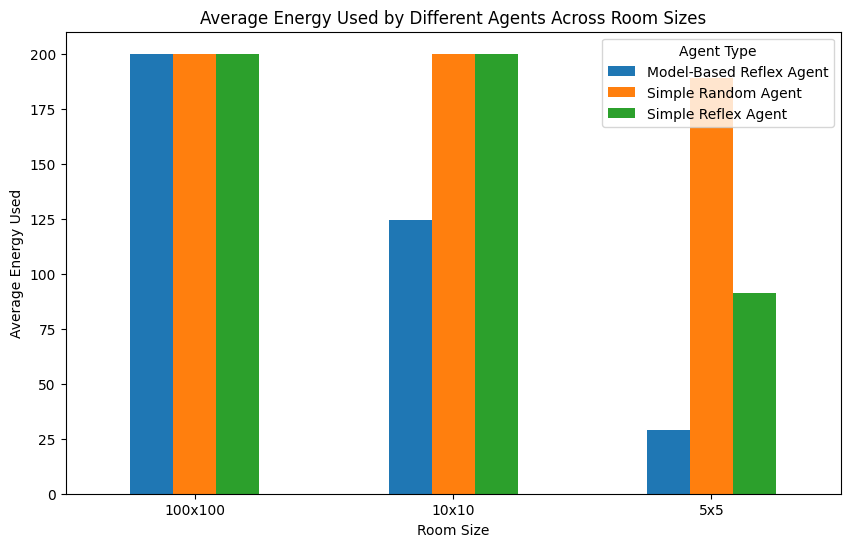

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import contextlib
import io

# Suppress output function
def suppress_output():
    return contextlib.redirect_stdout(io.StringIO())

# Function for running multiple simulations
def run_multiple_simulations(agent_function, room_size=5, dirt_prob=0.2, max_steps=200, num_runs=100, is_factory=False):
    total_energy_list = []
    for _ in range(num_runs):
        agent = agent_function(room_size) if is_factory else agent_function
        with suppress_output():  # Suppress output during simulation
            total_energy = environment(agent, room_size=room_size, dirt_prob=dirt_prob, max_steps=max_steps, verbose=False)
        total_energy_list.append(total_energy)
    return np.mean(total_energy_list)

# Room sizes to compare
room_sizes = [5, 10, 100]

# Dictionary of agents
agents = {
    'Simple Random Agent': (simple_randomized_agent, False),
    'Simple Reflex Agent': (simple_reflex_agent, False),
    'Model-Based Reflex Agent': (model_based_reflex_agent, True)
}

# Collect results
results = []
for room_size in room_sizes:
    for agent_name, (agent_function, is_factory) in agents.items():
        avg_energy_used = run_multiple_simulations(agent_function, room_size=room_size, num_runs=100, is_factory=is_factory)
        results.append([f'{room_size}x{room_size}', agent_name, avg_energy_used])

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Room Size', 'Agent', 'Avg Energy Used'])

# Pivot the DataFrame for easier display
pivot_table = results_df.pivot(index='Room Size', columns='Agent', values='Avg Energy Used')

# Display the pivot table
print(pivot_table)

# Plot the results using a bar graph
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Average Energy Used by Different Agents Across Room Sizes')
plt.xlabel('Room Size')
plt.ylabel('Average Energy Used')
plt.xticks(rotation=0)
plt.legend(title='Agent Type')
plt.show()


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     |188.74             |91.32               |28.88                     |
| 10x10   |200.00             |200.00               |124.47                    |
| 100x100 |200.00             |200.00               |200.00                    |

Add charts to compare the performance of the different agents.

# Discussion
## Visualization of Results
The above bar chart compares the average energy used by each agent across different room sizes.
In the 5x5 room, the Model-Based Reflex Agent performs significantly better,using only 28.88 steps compared to the Simple Reflex Agent which uses 91.32 steps and Simple Random Agent has 188.74 steps. This explains the efficiency of the model-based approach, which avoids unnecessary revisits and covers the room in a pattern.

In the 10x10 room, the Model-Based Reflex Agent is more efficient, using 124.47 steps, while both the Simple Reflex Agent and Simple Random Agent use the full 200 steps. In the 100x100 room, all agents use the maximum 200 steps, highlighting the difficulty of cleaning large spaces efficiently.

## Conclusion

The results demonstrate that the model-based reflex agent is the most efficient in smaller rooms, using fewer steps to clean the room compared to the simple random and simple reflex agents. However, all agents face challenges in larger rooms. Future improvements could include optimizing the model-based agent's strategy for handling larger environments more effectively.


## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).
* if the dirt sensor is not perfect and gives 10% of the time a wrong reading (clean when it is dirty or dirty when it is clean).
* if the bumper sensor is not perfect and 10% of the time does not report a wall when there is one.


##Rectangular Room with Unknown Size
-**Simple Random Agent**: The simple random agent would not adapt to the room size, as it moves randomly and doesn't remember where it has been or the layout of the room. As a result, it could miss cleaning some areas or take an excessive amount of energy to clean the room.

-**Simple Reflex Agent**: The simple reflex agent will handle this situation slightly better by avoiding walls and cleaning squares it detects as dirty. However, without an internal memory of its movements, it will still revisit the same areas, which may cause inefficiency.

-**Model-Based Reflex Agent**: Model based agent, with its internal state and tracking of visited and cleaned squares it will perform better. Even in an unknown room size, the model-based reflex agent will explore and clean systematically, covering the room more efficiently compared to the random and simple reflex agents.
## Cleaning Area with Irregular Shape (e.g., a Hallway Connecting Two Rooms)
-**Simple Random Agent**: The agent would struggle with an irregular shape due to its random movement. It might get stuck in one part of the room and repeatedly revisit it without cleaning the entire space.

-**Simple Reflex Agent**: The agent would avoid walls and clean as it moves, but it would still struggle to systematically clean irregularly shaped rooms. Without a memory of its movements, it could miss areas.

-**Model-Based Reflex Agent**: The model-based agent would perform best here. By keeping track of visited squares, it can handle the irregular shape efficiently and ensure it covers the entire area. It can adjust its movement pattern to accommodate the non-rectangular layout.
## Room with Obstacles (i.e., Squares It Cannot Pass Through)
-**Simple Random Agent**: The random agent would bump into obstacles frequently, wasting energy without making much progress. It would be very inefficient in such an environment.

-**Simple Reflex Agent**: The reflex agent would avoid obstacles using its bumper sensors, but without an efficient exploration pattern, it might spend too much time moving around the obstacles.

-**Model-Based Reflex Agent**: The model-based reflex agent would handle obstacles best. By remembering where it has been and what areas are blocked, it would navigate around obstacles efficiently and ensure that all accessible areas are cleaned.
## Imperfect Dirt Sensor (10% Chance of Incorrect Reading)
-**Simple Random Agent**: Since the agent acts randomly and doesn't take into account whether a square is actually clean or dirty, the incorrect readings would not have a noticeable effect on its performance. It is already inefficient.

-**Simple Reflex Agent**: The simple reflex agent would be affected by the incorrect sensor readings, possibly cleaning clean squares or missing dirty ones. Without memory, it cannot revisit or correct these errors effectively.

-**Model-Based Reflex Agent**: The model-based agent would handle this better. It keeps track of squares that were suspected of being dirty, even if the sensor provided incorrect readings. This allows it to revisit squares where it suspects errors and improves its overall cleaning performance, despite the imperfect sensor.
##Imperfect Bumper Sensor (10% Chance of Incorrect Wall Detection)
-**Simple Random Agent**: The random agent would continue bumping into walls due to the imperfect sensor, wasting energy and making no progress in certain directions.

-**Simple Reflex Agent**: The agent would occasionally try to move into a wall due to the sensor failure, which would slightly affect its efficiency but not as much as the random agent. It would still move away after detecting a wall eventually.

-**Model-Based Reflex Agent**: The model-based reflex agent would be least affected, as it remembers the locations of walls after encountering them once. Even if a sensor fails to detect a wall temporarily, the agent would adjust its movement based on its internal memory, reducing the impact of incorrect sensor readings.

## Advanced task: Imperfect Dirt Sensor

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Change your simulation environment to run experiments for the following problem: The dirt sensor has a 10% chance of giving the wrong reading. Perform experiments to observe how this changes the performance of the three implementations. Your model-based reflex agent is likely not able to clean the whole room, so you need to measure performance differently as a tradeoff between energy cost and number of uncleaned squares.

2. Design an implement a solution for your model-based agent that will clean better. Show the improvement with experiments.

In [62]:
# Your code and discussion goes hereimport numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import contextlib
import io

# Suppress output function
def suppress_output():
    return contextlib.redirect_stdout(io.StringIO())

# Modify the get_sensors function to introduce a 10% chance of incorrect dirt sensor reading
def get_sensors_imperfect(agent_position, room):
    x, y = agent_position
    n = room.shape[0]
    bumpers = {
        "north": (x == 0),
        "south": (x == n-1),
        "west": (y == 0),
        "east": (y == n-1)
    }

    #10% error in the dirt sensor reading
    actual_dirt = room[x, y]
    dirt_sensor = actual_dirt if random.random() > 0.1 else (1 - actual_dirt)  # 10% chance of wrong reading
    return bumpers, dirt_sensor

# The environment simulator with the imperfect dirt sensor
def imperfect_environment(agent_function, room_size=5, dirt_prob=0.2, max_steps=100, verbose=False):
    # Initialize the room and agent position
    room = np.random.choice([0, 1], size=(room_size, room_size), p=[1 - dirt_prob, dirt_prob])
    agent_position = (random.randint(0, room_size - 1), random.randint(0, room_size - 1))
    total_energy = 0  # Performance measure: number of actions taken
    uncleaned_squares = np.sum(room)  # Track the number of dirty squares at the start

    for step in range(max_steps):
        bumpers, dirt = get_sensors_imperfect(agent_position, room)  # Get sensors with imperfect dirt sensor
        action = agent_function(bumpers, dirt)  # Call agent function to get the next action

        # Perform the action
        if action == "suck" and room[agent_position] == 1:  # Only clean if the square is actually dirty
            room[agent_position] = 0  # Clean the square
        else:
            agent_position = move_agent(agent_position, action, bumpers)  # Move the agent

        # Increment the performance measure (1 action = 1 energy unit)
        total_energy += 1

        # If all squares are clean, stop the simulation
        if np.sum(room) == 0:
            break

    uncleaned_squares = np.sum(room)  # Count how many squares remain dirty
    return total_energy, uncleaned_squares  # Return both energy used and uncleaned squares

# Improved Model-Based Reflex Agent for Imperfect Sensor
def improved_model_based_reflex_agent(room_size):
    # Initialize agent state
    agent_state = {
        'visited_squares': set(),    # Track visited squares
        'cleaned_squares': set(),    # Track cleaned squares
        'agent_position': place_agent(room_size),  # Current agent position
        'direction': 'east',         # Start moving east after reaching the corner
        'suspected_dirty_squares': set()  # Keep track of suspected dirty squares due to imperfect sensor
    }

    def agent_function(bumpers, dirty):
        x, y = agent_state['agent_position']

        # If dirty, clean it and add it to cleaned squares
        if dirty and (x, y) not in agent_state['cleaned_squares']:
            agent_state['cleaned_squares'].add((x, y))
            return "suck"

        # If square was falsely marked clean but agent suspects it is dirty
        if (x, y) in agent_state['suspected_dirty_squares'] and (x, y) not in agent_state['cleaned_squares']:
            return "suck"  # Re-clean suspected dirty squares

        # Move in a zigzag pattern
        if agent_state['direction'] == "east":
            if not bumpers["east"]:
                agent_state['agent_position'] = move_agent((x, y), "east", bumpers)
                return "east"
            elif not bumpers["south"]:
                agent_state['agent_position'] = move_agent((x, y), "south", bumpers)
                agent_state['direction'] = "west"
                return "south"
        elif agent_state['direction'] == "west":
            if not bumpers["west"]:
                agent_state['agent_position'] = move_agent((x, y), "west", bumpers)
                return "west"
            elif not bumpers["south"]:
                agent_state['agent_position'] = move_agent((x, y), "south", bumpers)
                agent_state['direction'] = "east"
                return "south"

        # If there's nothing left to do, clean the current square
        return "suck"

    return agent_function

# Run multiple simulations with imperfect sensor
def run_imperfect_simulations(agent_function, room_size=5, dirt_prob=0.2, max_steps=100, num_runs=100, is_factory=False):
    total_energy_list = []
    uncleaned_list = []
    for _ in range(num_runs):
        agent = agent_function(room_size) if is_factory else agent_function
        with suppress_output():  # Suppress output during simulation
            total_energy, uncleaned_squares = imperfect_environment(agent, room_size=room_size, dirt_prob=dirt_prob, max_steps=max_steps, verbose=False)
        total_energy_list.append(total_energy)
        uncleaned_list.append(uncleaned_squares)
    return np.mean(total_energy_list), np.mean(uncleaned_list)

# Room sizes to compare
room_sizes = [5, 10, 100]

# Dictionary of agents
agents = {
    'Simple Random Agent': (simple_randomized_agent, False),
    'Simple Reflex Agent': (simple_reflex_agent, False),
    'Improved Model-Based Reflex Agent': (improved_model_based_reflex_agent, True)
}

# Collect results
results = []
for room_size in room_sizes:
    for agent_name, (agent_function, is_factory) in agents.items():
        avg_energy_used, avg_uncleaned = run_imperfect_simulations(agent_function, room_size=room_size, num_runs=100, is_factory=is_factory)
        results.append([f'{room_size}x{room_size}', agent_name, avg_energy_used, avg_uncleaned])

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Room Size', 'Agent', 'Avg Energy Used', 'Avg Uncleaned Squares'])

# Pivot the DataFrame for easier display
pivot_table = results_df.pivot(index='Room Size', columns='Agent', values='Avg Energy Used')
pivot_table_uncleaned = results_df.pivot(index='Room Size', columns='Agent', values='Avg Uncleaned Squares')

# Display the pivot table
print("Average Energy Used:")
print(pivot_table)

print("\nAverage Uncleaned Squares:")
print(pivot_table_uncleaned)



Average Energy Used:
Agent      Improved Model-Based Reflex Agent  Simple Random Agent  \
Room Size                                                           
100x100                               100.00               100.00   
10x10                                 100.00               100.00   
5x5                                    85.07                98.58   

Agent      Simple Reflex Agent  
Room Size                       
100x100                 100.00  
10x10                   100.00  
5x5                      85.72  

Average Uncleaned Squares:
Agent      Improved Model-Based Reflex Agent  Simple Random Agent  \
Room Size                                                           
100x100                              1987.24              2000.73   
10x10                                  11.00                17.52   
5x5                                     2.51                 2.98   

Agent      Simple Reflex Agent  
Room Size                       
100x100                1993.

# Discussion

In this experiment, we tested how three agents (Simple Random Agent, Simple Reflex Agent, and the Improved Model-Based Reflex Agent) handled a situation where the dirt sensor gave wrong readings 10% of the time. Here are the key findings:

- **Energy Use**: The Improved Model-Based Reflex Agent used much less energy to clean smaller rooms (like the 5x5 room) compared to the other two agents. This shows that it is more efficient in cleaning systematically. However, when we tested it in larger rooms (like 10x10 or 100x100), all agents took more steps due to the room size and the sensor errors.

- **Uncleaned squares**: Even with the sensor errors, the Improved Model-Based Reflex Agent left fewer dirty squares than the other agents. This is because it remembers which areas it has cleaned, making it more thorough, especially in smaller rooms.

In conclusion, the Improved Model-Based Reflex Agent was the most effective, particularly in smaller rooms. However, for larger rooms and environments with sensor errors, it could still be improved to be more efficient.

## More advanced implementation tasks

* __Obstacles:__ Change your simulation environment to run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Perform experiments to observe how this changes the performance of the three implementations. Describe what would need to be done to perform better with obstacles. Add code if you can.

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actually depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currently clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

##Ideas:
1.For obstacles, the agent needs to build a map and use a systematic exploration strategy.

2.For unknown environments, DFS-like exploration ensures the cleaning.

3.For utility-based agents, learning probabilities of dirt reappearing allows the agent to maximize cleanliness by focusing on high-probability squares.

In [ ]:
# Your ideas/code